In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams['figure.dpi']=150
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('/content/heart_disease.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
df.describe(include='object')

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,718,495,542,516,453,358


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df['exang'].value_counts()

,count
exang,
False,516
True,337
TURE,36
FALSE,19


In [7]:
df['exang'].replace('TURE','True',inplace=True)
df['exang'].replace('FALSE','False',inplace=True)

In [8]:
df['exang'].astype(str)

,exang
0,False
1,False
2,False
3,False
4,True
...,...
903,False
904,True
905,True
906,True


#Missing value Imputation


In [9]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [10]:
# Calculate the percentage of missing values in 'oldpeak' column
percentage = (df['oldpeak'].isna().sum() / len(df)) * 100
print(percentage)

6.828193832599119


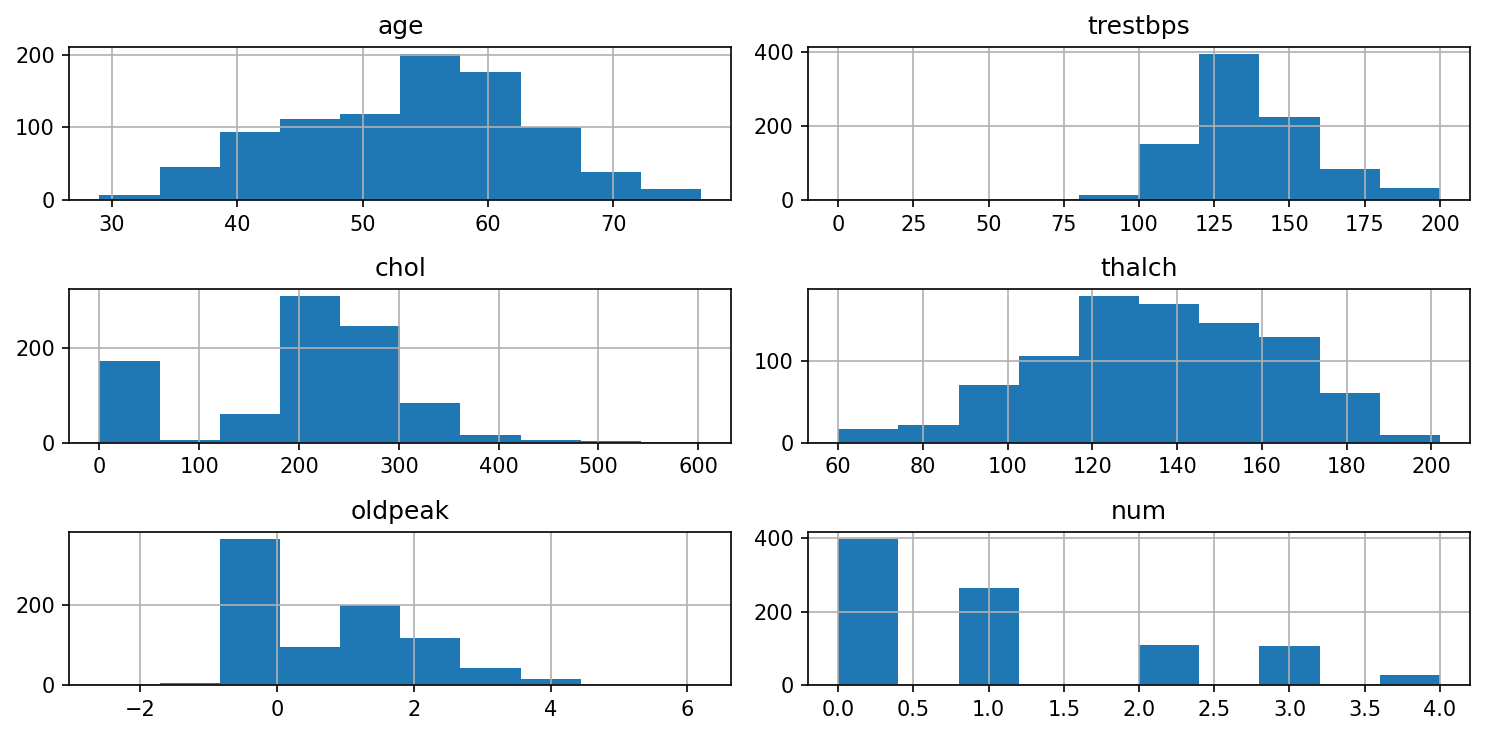

In [11]:
#As its greater than 6% we will replace by median if putliers present or else mean
df.hist()
plt.tight_layout()
plt.show()

<Axes: >

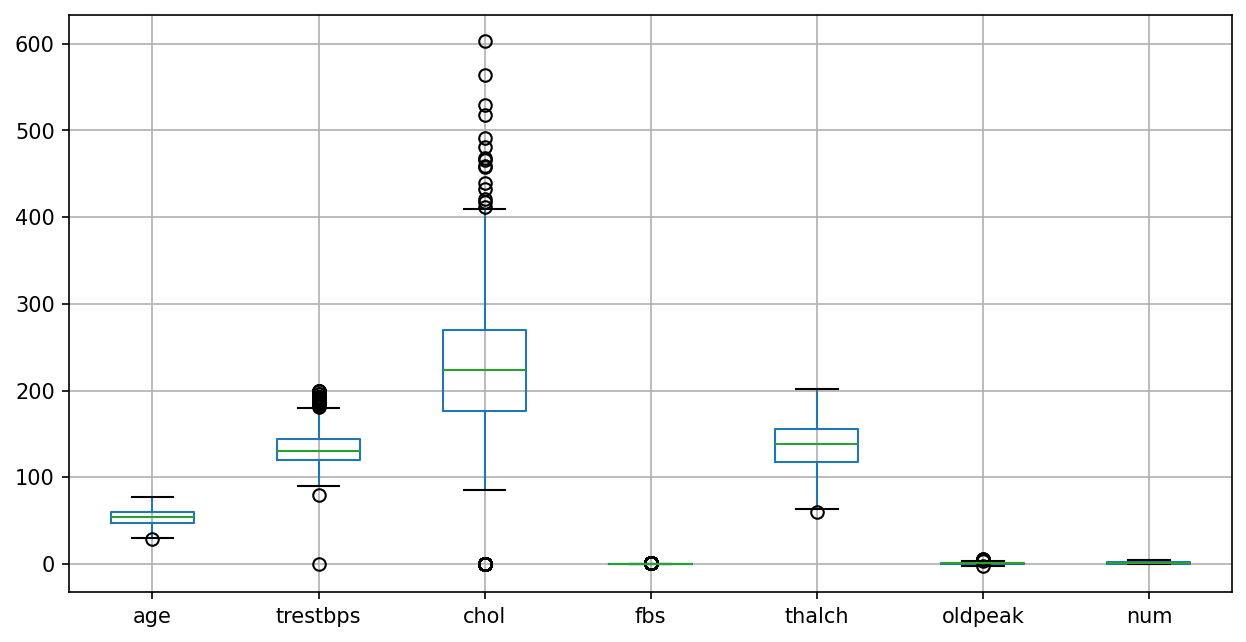

In [12]:
df.boxplot()

In [13]:
#outliers are present so we will replace it with median
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [14]:
df.duplicated().sum()

0

<Axes: >

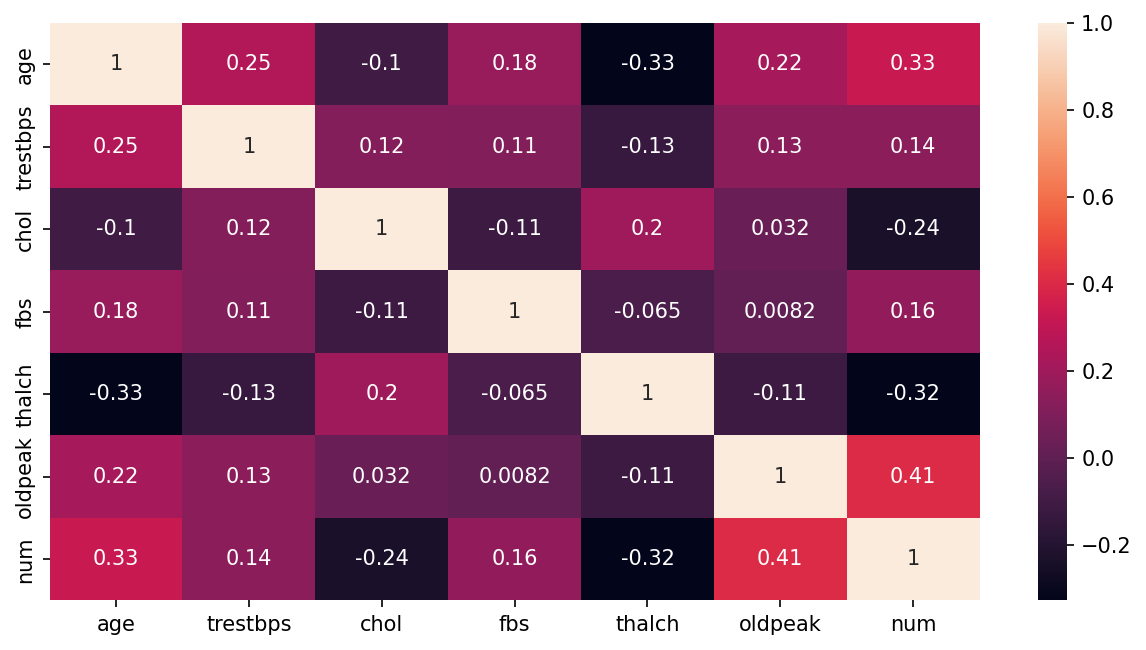

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Spiliting data in x and y

In [26]:
x1=df.iloc[:,:-1]
y=df.iloc[:,-1]
x1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect


In [31]:
#Converting categorical data to numeric
cat_cols=x1.select_dtypes(include='object').columns
cat_cols


Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [32]:
for col in cat_cols:
    x1[col] = x1[col].astype(str)

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x1[cat_cols]=oe.fit_transform(x1[cat_cols])
x1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1.0,3.0,145,233,True,0.0,150,0.0,2.3,0.0,0.0
1,41,1.0,1.0,135,203,False,1.0,132,0.0,0.0,1.0,0.0
2,57,1.0,0.0,140,192,False,1.0,148,0.0,0.4,1.0,0.0
3,52,1.0,3.0,118,186,False,0.0,190,0.0,0.0,1.0,0.0
4,57,1.0,0.0,110,201,False,1.0,126,1.0,1.5,1.0,0.0


#Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x1)

array([[ 1.00602683,  0.51441613,  2.32027607, ...,  1.35440293,
        -1.6727697 , -1.52054878],
       [-1.39756029,  0.51441613,  0.23225756, ..., -0.81571758,
        -0.22484321, -1.52054878],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.43830532,
        -0.22484321, -1.52054878],
       ...,
       [ 0.24124911,  0.51441613,  1.27626682, ...,  1.54310906,
        -1.6727697 , -0.20813595],
       [ 0.24124911,  0.51441613,  1.27626682, ..., -0.34395225,
        -1.6727697 , -0.20813595],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.34395225,
        -0.22484321, -0.20813595]])

In [34]:
x=pd.DataFrame(sc.fit_transform(x1),columns=x1.columns)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.834983,1.354403,-1.672770,-1.520549
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.834983,-0.815718,-0.224843,-1.520549
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.834983,-0.438305,-0.224843,-1.520549
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.834983,-0.815718,-0.224843,-1.520549
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.197629,0.599578,-0.224843,-1.520549


In [35]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,908.000000,9.080000e+02,9.080000e+02,9.080000e+02
mean,2.034594e-16,-1.878087e-16,-9.390433e-17,-3.364905e-16,-1.252058e-16,-3.130144e-17,-5.477752e-17,-2.504115e-16,0.000000,6.260288e-17,-6.260288e-17,1.878087e-16
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551,1.000551e+00,1.000551e+00,1.000551e+00
min,-2.708608e+00,-1.943951e+00,-8.117517e-01,-6.543805e+00,-1.798388e+00,-5.058441e-01,-1.561352e+00,-2.835259e+00,-0.834983,-3.268897e+00,-1.672770e+00,-1.520549e+00
25%,-6.600961e-01,5.144161e-01,-8.117517e-01,-6.586745e-01,-2.207731e-01,-5.058441e-01,1.387869e-02,-6.702851e-01,-0.834983,-8.157176e-01,-2.248432e-01,-2.081360e-01
50%,2.274119e-02,5.144161e-01,-8.117517e-01,-1.682469e-01,2.009656e-01,-5.058441e-01,1.387869e-02,7.625752e-02,-0.834983,-3.439523e-01,-2.248432e-01,-2.081360e-01
75%,6.782649e-01,5.144161e-01,1.276267e+00,5.183517e-01,6.115471e-01,-5.058441e-01,1.387869e-02,7.481459e-01,1.197629,5.995784e-01,1.223083e+00,1.104277e+00
max,2.535582e+00,5.144161e-01,2.320276e+00,3.264746e+00,3.583801e+00,1.976894e+00,1.589110e+00,2.465194e+00,1.197629,5.034172e+00,1.223083e+00,1.104277e+00


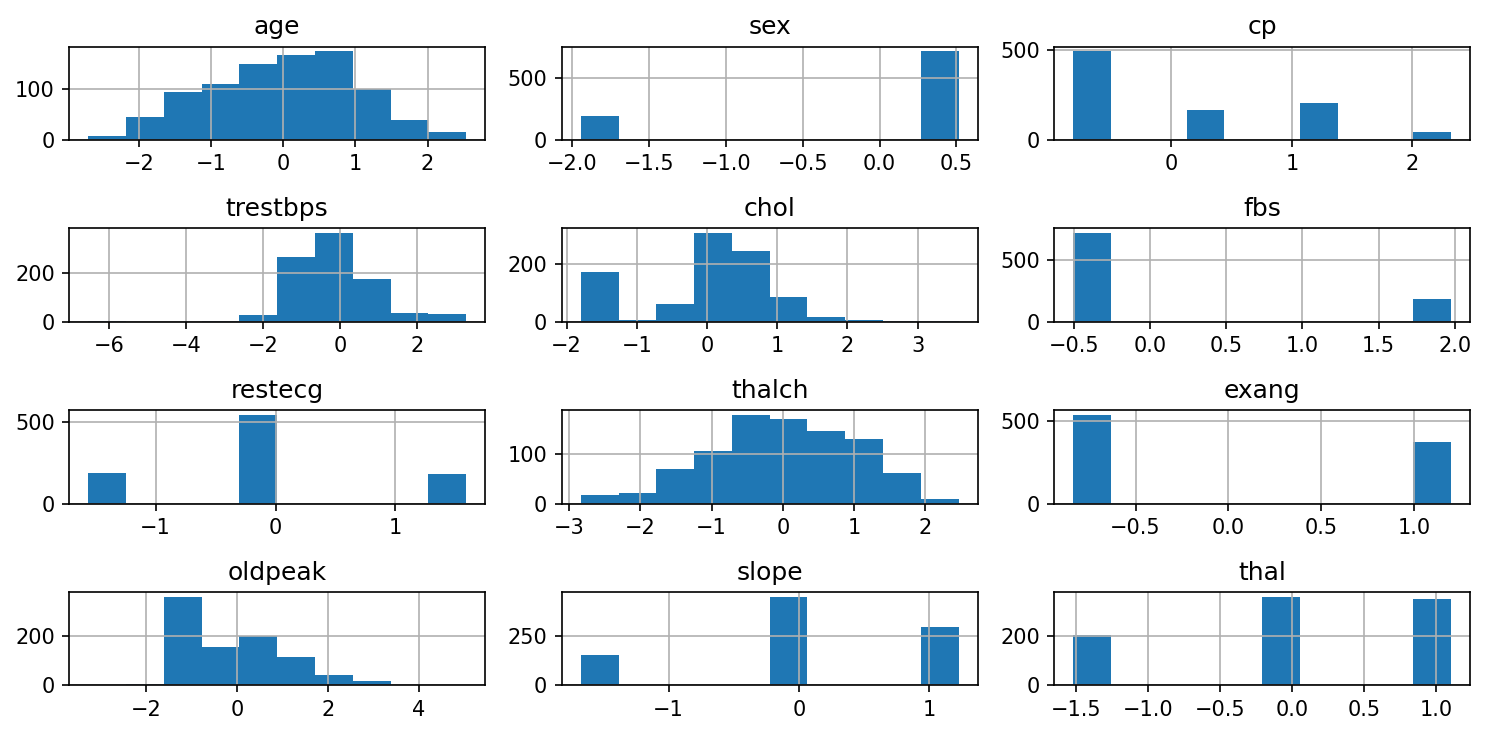

In [36]:
x.hist()
plt.tight_layout()
plt.show()

#Split data in train and test data

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,-1.288306,0.514416,0.232258,-0.658674,0.834689,-0.505844,0.013879,0.972109,-0.834983,-0.815718,1.223083,-0.208136
10,-2.599354,-1.943951,2.320276,1.793463,0.316999,-0.505844,1.589110,1.270726,-0.834983,-0.815718,-1.672770,-1.520549
617,2.207820,0.514416,1.276267,0.322181,0.316999,1.976894,0.013879,-1.566136,-0.834983,-0.815718,1.223083,1.104277
250,-1.397560,0.514416,-0.811752,-1.443359,-1.798388,-0.505844,1.589110,-0.931575,-0.834983,-0.815718,-0.224843,-1.520549
869,-0.523529,0.514416,1.276267,0.175052,-0.530941,-0.505844,0.013879,-2.536642,-0.834983,-0.343952,-0.224843,1.104277


#Model Building using Entropy criteria

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
model=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=2)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.29\nentropy = 1.938\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.25, 0.5, 'x[9] <= 1.213\nentropy = 2.076\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 1.981\nsamples = 349\nvalue = [84.0, 148.0, 56.0, 53.0, 8.0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.121\nsamples = 59\nvalue = [2, 15, 15, 17, 10]'),
 Text(0.75, 0.5, 'x[4] <= -0.741\nentropy = 1.338\nsamples = 318\nvalue = [224.0, 54.0, 16.0, 20.0, 4.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 2.164\nsamples = 38\nvalue = [8, 12, 9, 7, 2]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.089\nsamples = 280\nvalue = [216, 42, 7, 13, 2]')]

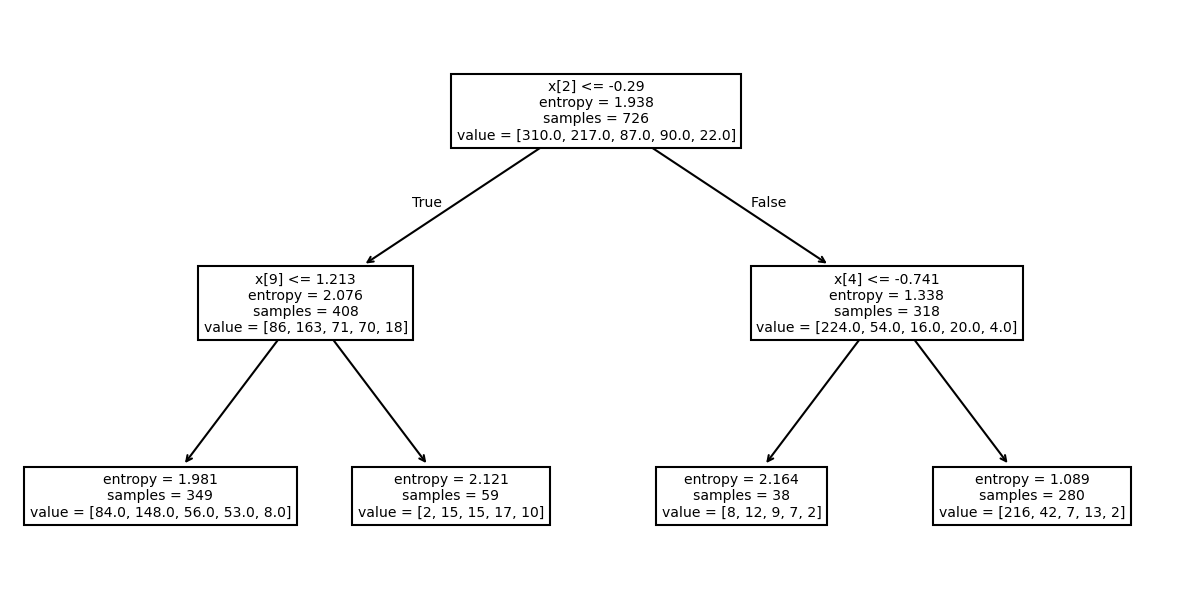

In [38]:
tree.plot_tree(model)

In [39]:
ytrain.value_counts()

,count
num,
0,310
1,217
3,90
2,87
4,22


#HyperParameterTuning

In [40]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['entropy','gini'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [41]:
grid=GridSearchCV(DecisionTreeClassifier(),params,cv=5)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                       20, 30, 40, 50, 70, 90, 120, 150]})

In [42]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [43]:
#Final model
model=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[2] <= -0.29\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.25, 0.625, 'x[0] <= 0.624\ngini = 0.734\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 0.181\ngini = 0.685\nsamples = 269\nvalue = [69, 125, 37, 31, 7]'),
 Text(0.0625, 0.125, 'gini = 0.693\nsamples = 120\nvalue = [48, 41, 19, 6, 6]'),
 Text(0.1875, 0.125, 'gini = 0.62\nsamples = 149\nvalue = [21, 84, 18, 25, 1]'),
 Text(0.375, 0.375, 'x[3] <= -0.855\ngini = 0.765\nsamples = 139\nvalue = [17, 38, 34, 39, 11]'),
 Text(0.3125, 0.125, 'gini = 0.512\nsamples = 18\nvalue = [2, 12, 3, 1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.766\nsamples = 121\nvalue = [15.0, 26.0, 31.0, 38.0, 11.0]'),
 Text(0.75, 0.625, 'x[4] <= -0.741\ngini = 0.468\nsamples = 318\nvalue = [224.0, 54.0, 16.0, 20.0, 4.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= -1.958\ngini = 0.763\nsamples = 38\nvalue = [8, 12, 9, 7, 2]'),
 Text(0

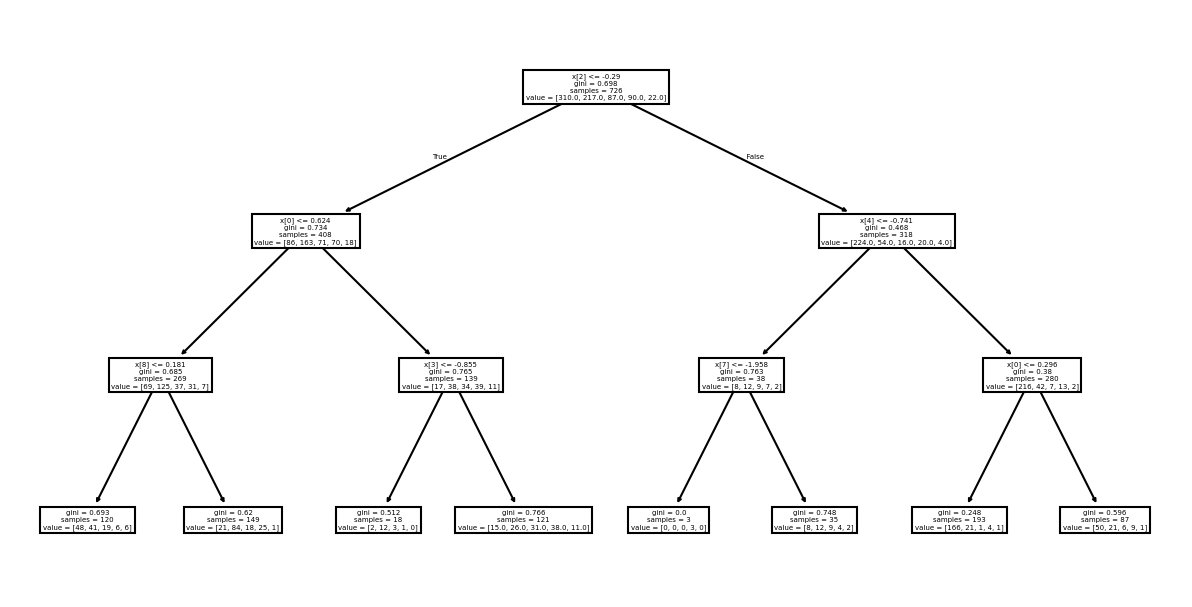

In [44]:
tree.plot_tree(model)

In [45]:
colnames=list(x.columns)
colnames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal']

In [46]:
y.value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


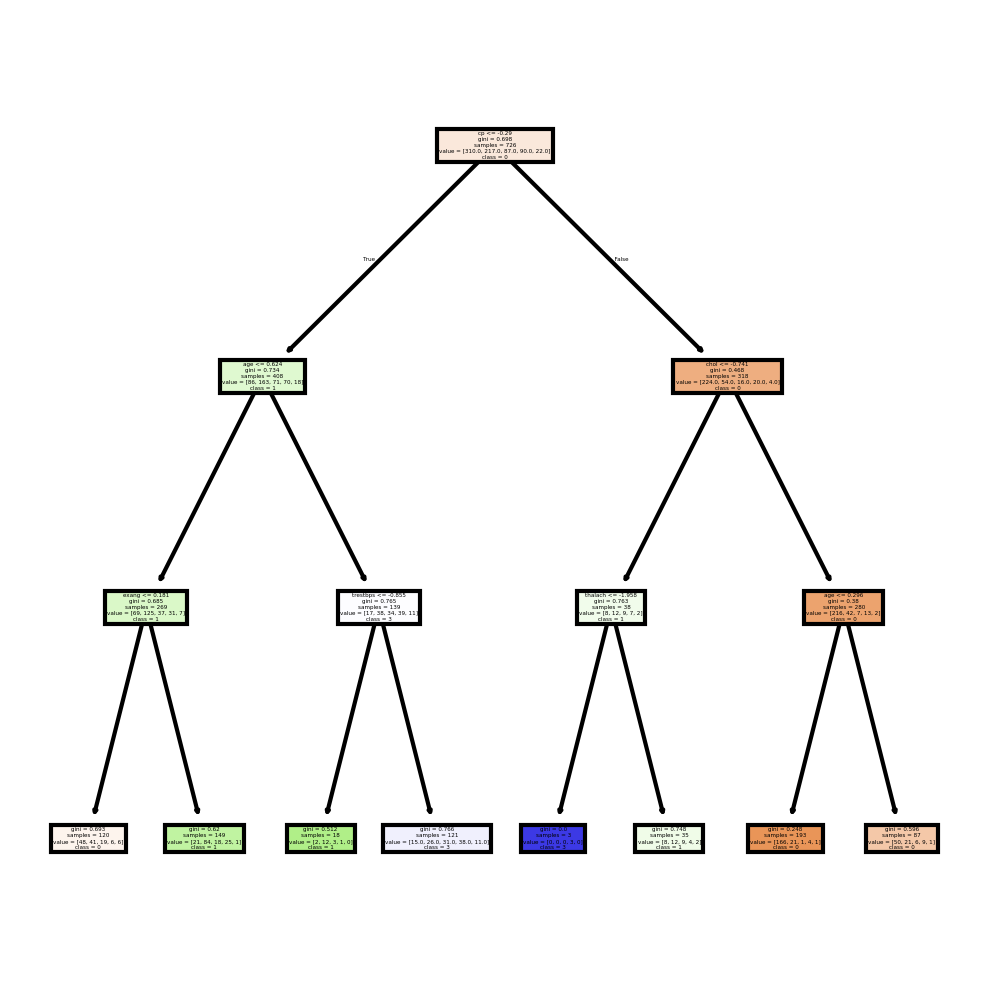

In [47]:
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
cn=['0','1','2','3','4']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()

#Predicting on test data

In [48]:
pred=model.predict(xtest)
np.mean(pred==ytest)

0.5714285714285714

In [49]:
pd.Series(pred).value_counts()

,count
0,107
1,56
3,19


In [50]:
model.feature_importances_

array([0.1492486 , 0.        , 0.56158294, 0.04360232, 0.1321949 ,
       0.        , 0.        , 0.0273891 , 0.08598216, 0.        ,
       0.        , 0.        ])

In [58]:
IF=pd.DataFrame(model.feature_importances_).T
IF.columns=x.columns
IF
##Therefore cp is an important feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.149249,0.0,0.561583,0.043602,0.132195,0.0,0.0,0.027389,0.085982,0.0,0.0,0.0


In [51]:
cm=confusion_matrix(ytest,pred)
cm

array([[76, 10,  0,  3,  0],
       [19, 24,  0,  5,  0],
       [ 5, 12,  0,  5,  0],
       [ 5,  8,  0,  4,  0],
       [ 2,  2,  0,  2,  0]])

In [52]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182



In [53]:
auc=roc_auc_score(ytest, model.predict_proba(xtest), multi_class='ovr') # or multi_class='ovo'
auc

0.7399257768280598

Thus its a good model from roc_auc_score.